In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
os.getenv("GROQ_API_KEY")
model="moonshotai/kimi-k2-instruct-0905"

In [2]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name=model)
llm.invoke("Hello")

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 27, 'total_tokens': 38, 'completion_time': 0.021566724, 'completion_tokens_details': None, 'prompt_time': 0.009437758, 'prompt_tokens_details': None, 'queue_time': 0.287409482, 'total_time': 0.031004482}, 'model_name': 'moonshotai/kimi-k2-instruct-0905', 'system_fingerprint': 'fp_05df423bab', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bb800-fe9a-7fd2-bd69-60a3f8fa23b0-0', usage_metadata={'input_tokens': 27, 'output_tokens': 11, 'total_tokens': 38})

In [3]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers together."""
    return a * b

def add(a: int, b: int) -> int:
    """Add two numbers together."""
    return a + b

def divide(a: int, b: int) -> int:
    """Divide two numbers together."""
    return a / b



In [26]:
!pip install youtube_search
!pip install duckduckgo-search
!pip install -U ddgs

from langchain_community.tools import YouTubeSearchTool
from langchain_community.tools import DuckDuckGoSearchRun

duckduckgo_tool = DuckDuckGoSearchRun()
youtube_tool = YouTubeSearchTool()

duckduckgo_tool.invoke("What is the capital of Finland?")



'Helsinki[a] (Swedish: Helsingfors) [b] is the capital and most populous city in Finland . It is on the shore of the Gulf of Finland and is the seat of southern Finland\'s Uusimaa region. About 690,000 people live in the municipality, with 1.3 million in the capital region and 1.6 million in the metropolitan area. Helsinki, capital and largest city of Finland . It is the leading seaport and industrial city of the country. Helsinki lies in the far south of Finland , on a peninsula fringed by fine natural harbors that protrudes into the Gulf of Finland . The most northerly of continental European capitals , Helsinki is often called the "white city of the north," because many of its buildings are ... Finland is a modern Nordic country known for its clean nature, good education system and high quality of life. This page contains basic facts about Finland . Finland\'s capital city Helsinki has a truly fascinating history with strong influences from Sweden, the Baltics and the Russian Empire

In [71]:
from langgraph.graph import StateGraph, MessagesState, START, END
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.prebuilt import ToolNode, tools_condition

tools = [add, multiply, divide, duckduckgo_tool, youtube_tool]
llm_with_tools=llm.bind_tools(tools)

def function_1(state: MessagesState):
    # This appends a system message to the history correctly
    user_message = state["messages"]
    input_question = ["You are a helpful assistant tasked to answer questions using the tools provided and performing arithmetic operations on set of input."]+user_message
    res = llm_with_tools.invoke(input_question)
    return {"messages": res}



In [72]:
builder = StateGraph(MessagesState)

builder.add_node("llm_decision_step", function_1)

builder.add_node("tool_step", ToolNode(tools))

builder.add_edge(START, "llm_decision_step")

builder.add_conditional_edges(
    "llm_decision_step", 
    tools_condition, 
    {
        "tools": "tool_step",  # Map the condition's result to your node name
        END: END               # Map the end condition to the END state
    }
)

builder.add_edge("tool_step", "llm_decision_step")


react_graph = builder.compile()

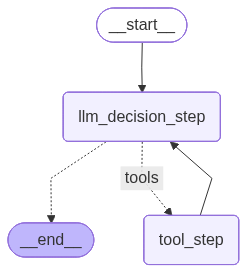

In [73]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [74]:
message = [HumanMessage(content="what is 2 times narendra modi's age?")]
react_graph.invoke({"messages": message})


{'messages': [HumanMessage(content="what is 2 times narendra modi's age?", additional_kwargs={}, response_metadata={}, id='1816cccc-d011-4940-9d42-1968b42e7b05'),
  AIMessage(content="I need to find Narendra Modi's age first, then multiply it by 2.\n\nLet me search for Narendra Modi's current age:", additional_kwargs={'tool_calls': [{'id': 'functions.duckduckgo_search:0', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 461, 'total_tokens': 514, 'completion_time': 0.189661416, 'completion_tokens_details': None, 'prompt_time': 0.04404931, 'prompt_tokens_details': None, 'queue_time': 0.285281218, 'total_time': 0.233710726}, 'model_name': 'moonshotai/kimi-k2-instruct-0905', 'system_fingerprint': 'fp_3312304636', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bb82f-4009-7ba1-b0f2-

In [75]:
message = [HumanMessage(content="Who is mr. bearst? Give is top 5 videos.")]
react_graph.invoke({"messages": message})


{'messages': [HumanMessage(content='Who is mr. bearst? Give is top 5 videos.', additional_kwargs={}, response_metadata={}, id='ae4e41d1-d6b3-45f0-896b-0e4a1c89a90b'),
  AIMessage(content="I'll help you find information about Mr. Beast and his top videos. Let me search for both information and his YouTube videos.", additional_kwargs={'tool_calls': [{'id': 'functions.duckduckgo_search:0', 'function': {'arguments': '{"query":"Mr. Beast who is he YouTube personality"}', 'name': 'duckduckgo_search'}, 'type': 'function'}, {'id': 'functions.youtube_search:1', 'function': {'arguments': '{"query":"MrBeast,5"}', 'name': 'youtube_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 463, 'total_tokens': 535, 'completion_time': 0.268203057, 'completion_tokens_details': None, 'prompt_time': 0.029543283, 'prompt_tokens_details': {'cached_tokens': 256}, 'queue_time': 0.287185777, 'total_time': 0.29774634}, 'model_name': 'moonshotai/kimi-k2-instr